**1/ download dataset**

[yahoo finance](https://finance.yahoo.com/quote/MSFT/history/)

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./MSFT.csv')
print(df.shape)
df.head()

(9137, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064383,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


**2/ preprocessing data - visualization - EDA**

In [6]:
df[['Date','Close']]

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9132,2022-06-06,268.750000
9133,2022-06-07,272.500000
9134,2022-06-08,270.410004
9135,2022-06-09,264.790009


In [7]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9132    2022-06-06
9133    2022-06-07
9134    2022-06-08
9135    2022-06-09
9136    2022-06-10
Name: Date, Length: 9137, dtype: object

In [8]:
df['Date'][0].split('-')

['1986', '03', '13']

In [9]:
def str_to_datetime(s):
    '''
    Convert string to datetime format
    '''
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year= year,month=month, day=day)

# test your function
datetime_object = str_to_datetime(df['Date'][0])
datetime_object

datetime.datetime(1986, 3, 13, 0, 0)

In [10]:
# apply the function to 'Date' column
df['Date'] = df['Date'].apply(str_to_datetime)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064383,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


In [11]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9132   2022-06-06
9133   2022-06-07
9134   2022-06-08
9135   2022-06-09
9136   2022-06-10
Name: Date, Length: 9137, dtype: datetime64[ns]

In [12]:
# set the index is Date column
df.index = df.pop('Date')

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064383,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
2022-06-06,272.059998,274.179993,267.220001,268.750000,268.750000,22400300
2022-06-07,266.640015,273.130005,265.940002,272.500000,272.500000,22860700
2022-06-08,271.709991,273.000000,269.609985,270.410004,270.410004,17372300


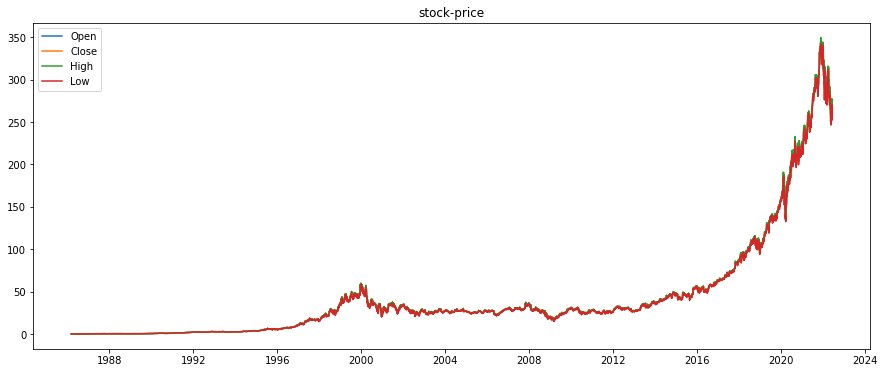

In [28]:
# plot
plt.figure(figsize = (15,6))
plt.plot(df.index,df['Open'],label = 'Open')
plt.plot(df.index,df['Close'],label = 'Close')
plt.plot(df.index,df['High'],label = 'High')
plt.plot(df.index,df['Low'],label = 'Low')
plt.legend()
plt.title('stock-price')
plt.savefig('./imgs/MSFT-stock-price.png')
plt.show()

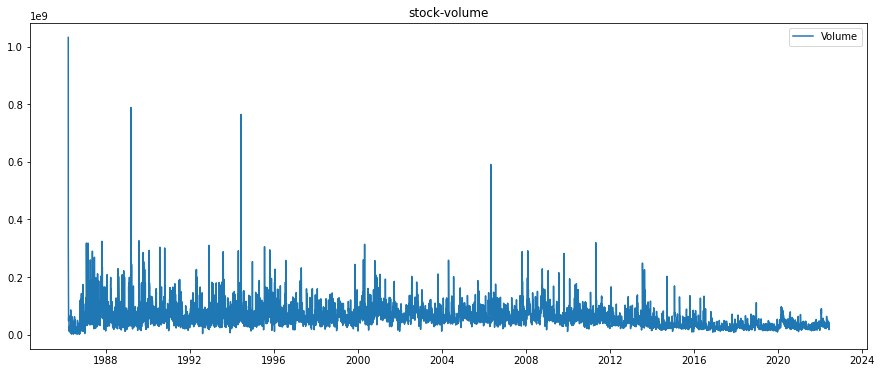

In [29]:
plt.figure(figsize = (15,6))
plt.plot(df.index,df['Volume'],label = 'Volume')
plt.legend()
plt.title('stock-volume')
plt.savefig('./imgs/MSFT-stock-volume.png')
plt.show()

We will forcus on 'Close' price

In [32]:
df['Close'].describe()

count    9137.000000
mean       42.741320
std        62.281374
min         0.090278
25%         4.414063
50%        26.879999
75%        40.468750
max       343.109985
Name: Close, dtype: float64

In [33]:
df_subset = df.loc[:str_to_datetime('2013-2-01')].tail(3+1)
df_subset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-29,27.820000,28.129999,27.600000,28.010000,23.210518,49242600
2013-01-30,28.010000,28.190001,27.760000,27.850000,23.077932,43580500
2013-01-31,27.790001,27.969999,27.400000,27.450001,22.746473,50530000
2013-02-01,27.670000,28.049999,27.549999,27.930000,23.144222,55565900


In [34]:
values = df_subset['Close'].to_numpy()
x,y = values[:-1],values[-1]
print(x)
print(y)

[28.01     27.85     27.450001]
27.93


In [35]:
next_week = df.loc[str_to_datetime('2013-2-01'):str_to_datetime('2013-2-01')+datetime.timedelta(days = 7)]
next_week

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-02-01,27.670000,28.049999,27.549999,27.930000,23.144222,55565900
2013-02-04,27.870001,28.020000,27.420000,27.440001,22.738192,50540000
2013-02-05,27.620001,27.660000,27.360001,27.500000,22.787907,35410400
2013-02-06,27.379999,27.540001,27.250000,27.340000,22.655325,41889600
2013-02-07,27.350000,27.389999,27.100000,27.280001,22.605606,38028300
2013-02-08,27.350000,27.709999,27.309999,27.549999,22.829334,33318500


In [36]:
next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
print(next_datetime_str)

2013-02-04T00:00:00.000000000


In [37]:
next_date_str = next_datetime_str.split('T')[0]
next_date_str

'2013-02-04'

In [38]:
year_month_day = next_date_str.split('-')
year_month_day

['2013', '02', '04']

In [39]:
def df_to_windowed_df(dataframe,first_date_str,last_date_str,n =3):
    '''
    create a sub-dataframe from a start-time back to n previous samples
    '''
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    target_date = first_date
    dates = []
    X,Y = [],[]
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1) # go back from target-date n samples
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return None
        
        values = df_subset['Close'].to_numpy()
        x,y = values[:-1],values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(Y)
        
        nex_week = dataframe.loc[target_date:target_date+datetime.timedelta(days = 7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year,month,day = year_month_day
        next_date = datetime.datetime(year = int(year),month =int(month),day = int(day))
        
        if last_time:
            break
        
        target_date = last_date
        
        if target_date == last_date:
            last_date = True
            
        ret_df = pd.DataFrame({})
        ret_df['Target Date'] = dates
        
        X = np.array(X)
        for i in range(n):
            X[:,i]
            ret_df[f'Target-{n-1}'] = X[:,i]
        ret_df['Target'] = Y
        
        return ret_df
    
# Start day second time arounf '2021-03-05'

windowed_df = df_to_windowed_df(df,'2021-03-25','2022-05-23',n =3)

windowed_df

,Target Date,Target-2,Target
0,2021-03-25,235.460007,[[[[[...]]]]]


**4/ build model**

**5/ train model**

**6/ evaluate model**

**7/ save and load model**

**8/ predict new-input**